In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("anemia.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


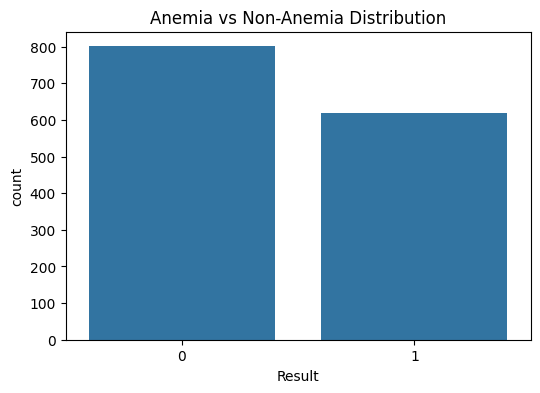

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Result', data=df)
plt.title("Anemia vs Non-Anemia Distribution")
plt.show()

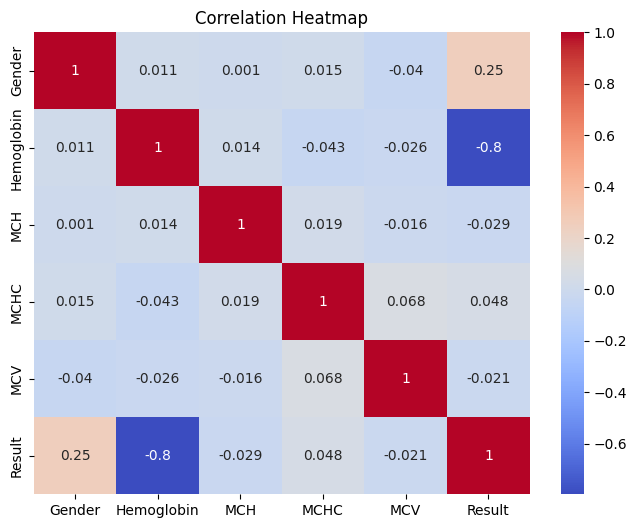

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Accuracy:", log_acc)

Logistic Accuracy: 0.9894736842105263


In [15]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_acc = accuracy_score(y_test, y_pred_ridge)
print("Ridge Accuracy:", ridge_acc)

Ridge Accuracy: 0.9649122807017544


In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 1.0


In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 1.0


In [18]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9824561403508771


In [ ]:
accuracy_dict = {
    "Logistic Regression": log_acc,
    "Ridge Classifier": ridge_acc,
    "Random Forest": rf_acc,
    "Decision Tree": dt_acc,
    "SVM": svm_acc
}
accuracy_dict

{'Logistic Regression': 0.9894736842105263,
 'Ridge Classifier': 0.9649122807017544,
 'Random Forest': 1.0,
 'Decision Tree': 1.0,
 'SVM': 0.9824561403508771}

In [20]:
import joblib

joblib.dump(rf, "Anemia_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']